In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
train = pd.read_csv('../input/train.csv')
print(train.shape)
train.head()

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


# Data Description
As is shown in the table above, the characteristics of the data are as follows:
1. The size of train data set is (595212, 59), which means there are 595212 samples for trainning and each sample has 57 features(not including 'id' and 'target').
2. Feature names contain postfix 'bin' to indicate binary features and 'cat' to indicate categorical features. Features without postfix mentioned above are either continuous or ordinal. 
3. Values of -1 indicate that the feature value was missing.
4. In order to deal with data better, we classify the features as 4 types as follow.


In [4]:
cat_features = []
bin_features = []
continue_features = []
ordinal_features = []
for i in train.columns[2:]:
    if i.endswith('_bin'):
        bin_features.append(i)
    elif i.endswith('_cat'):
        cat_features.append(i)
    elif train[i].dtype == 'float64':
        continue_features.append(i)
    elif train[i].dtype == 'int64':
        ordinal_features.append(i)
print ('categorical features:')
print (cat_features)
print ('binary features:')
print (bin_features)
print ('continue features:')
print (continue_features)
print ('ordinal features:')
print (ordinal_features)

categorical features:
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
binary features:
['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
continue features:
['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
ordinal features:
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


 ## (a) Missing Values
Because values of -1 indicate that the feature was missing from the observation, the distribution of missing values can be shown by counting numbers of '-1' of each column.

In [6]:
miss_features = []

for f in train.columns:
    miss = train[train[f] == -1][f].count()
    if miss > 0:
        miss_features.append(f)
        miss_perc = miss/train.shape[0]
        if f in continue_features:
            f += '(continue)'
        print('Feature {} has {} samples ({:.2%}) with missing values'.format(f, miss, miss_perc))
print('In total, there are {} variables with missing values'.format(len(miss_features)))

Feature ps_ind_02_cat has 216 samples (0.04%) with missing values
Feature ps_ind_04_cat has 83 samples (0.01%) with missing values
Feature ps_ind_05_cat has 5809 samples (0.98%) with missing values
Feature ps_reg_03(continue) has 107772 samples (18.11%) with missing values
Feature ps_car_01_cat has 107 samples (0.02%) with missing values
Feature ps_car_02_cat has 5 samples (0.00%) with missing values
Feature ps_car_03_cat has 411231 samples (69.09%) with missing values
Feature ps_car_05_cat has 266551 samples (44.78%) with missing values
Feature ps_car_07_cat has 11489 samples (1.93%) with missing values
Feature ps_car_09_cat has 569 samples (0.10%) with missing values
Feature ps_car_11 has 5 samples (0.00%) with missing values
Feature ps_car_12(continue) has 1 samples (0.00%) with missing values
Feature ps_car_14(continue) has 42620 samples (7.16%) with missing values
In total, there are 13 variables with missing values


As we can see in the two figures above, there are 13 features that contains missing values. Especially,  '**ps_reg_03**', '**ps_car_03_cat**', '**ps_car_05_cat**' and '**ps_car_14**' have many missing values to be handled.
## (b) Handling Missing Values
According to the features classification, we can handle features as follow:
1. '**ps_car_03_cat**' and  '**ps_car_05_cat**' have a large proportion of missing values, so at first we **remove** these two features.
2. '**ps_reg_03**', '**ps_car_12**', and '**ps_car_14**' are continuous values, so we replace the missing values by the **mean**.
3. Missing values of **other** features are replaced by the **mode**. 


# Data Visualization
In order to understand the data better, we use some figures to show the relationship between features and target.
## Categorical Features
### Relationships between Categorical features and the target.

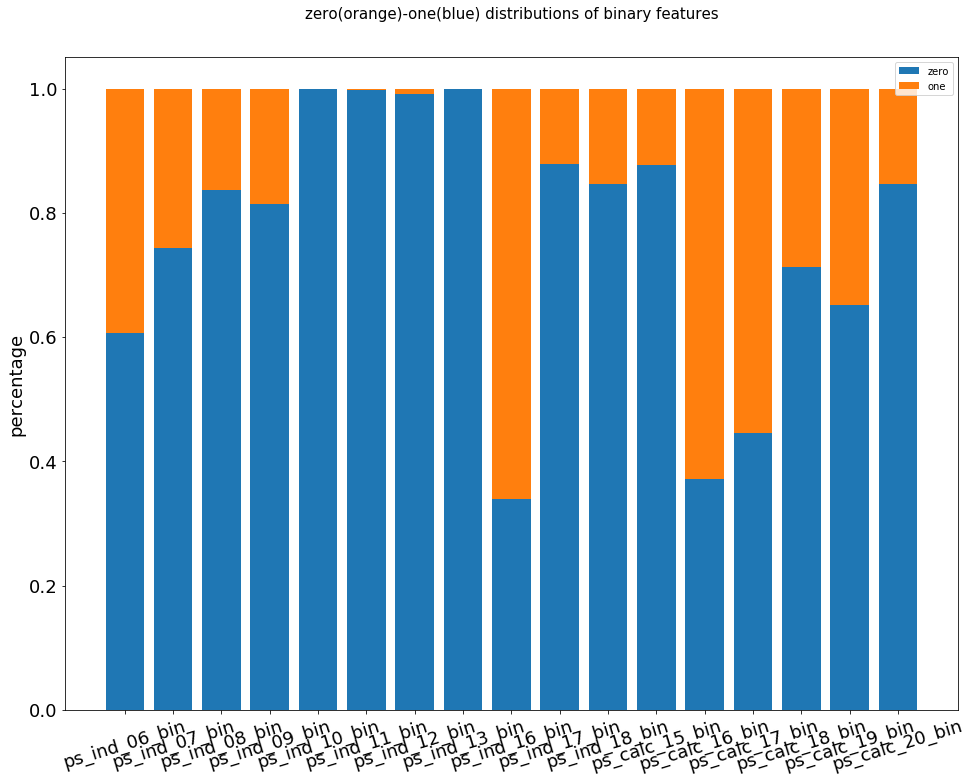

In [78]:
plt.figure(figsize=(16,12))
#bin_count = pd.DataFrame()
one_count = []
zero_count = []
total_samples = train.shape[0]
for f in bin_features:
    # Calculate the percentage of target=1 per category value
    ones = train[f].sum()/total_samples*1.0
    one_count.append(ones)
    zero_count.append(1-ones)
    #d = [temp['target'][0],temp['target'][1]]
    #new = pd.DataFrame(data=d, columns=[f])
    #bin_count = pd.concat([bin_count,new],axis=1)
# Bar plot
# Order the bars descending on target mean
#sns.barplot(ax=ax, x=bin_features, y='target', data=bin_count, order=cat_perc[f])
plt.bar(range(len(bin_features)), zero_count, label='zero')
plt.bar(range(len(bin_features)), one_count, bottom=zero_count, label='one')

plt.title('zero(orange)-one(blue) distributions of binary features', y=1.05, size=15)
plt.ylabel('percentage', fontsize=18)
plt.xticks(range(len(bin_features)), bin_features,rotation=17 , fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()

As we can see, '**ps_ind_09_bin**', '**ps_ind_10_bin**', '**ps_ind_11_bin**', and '**ps_ind_12_bin**' are **almost full zeros**, so these four features might not be important to the target.

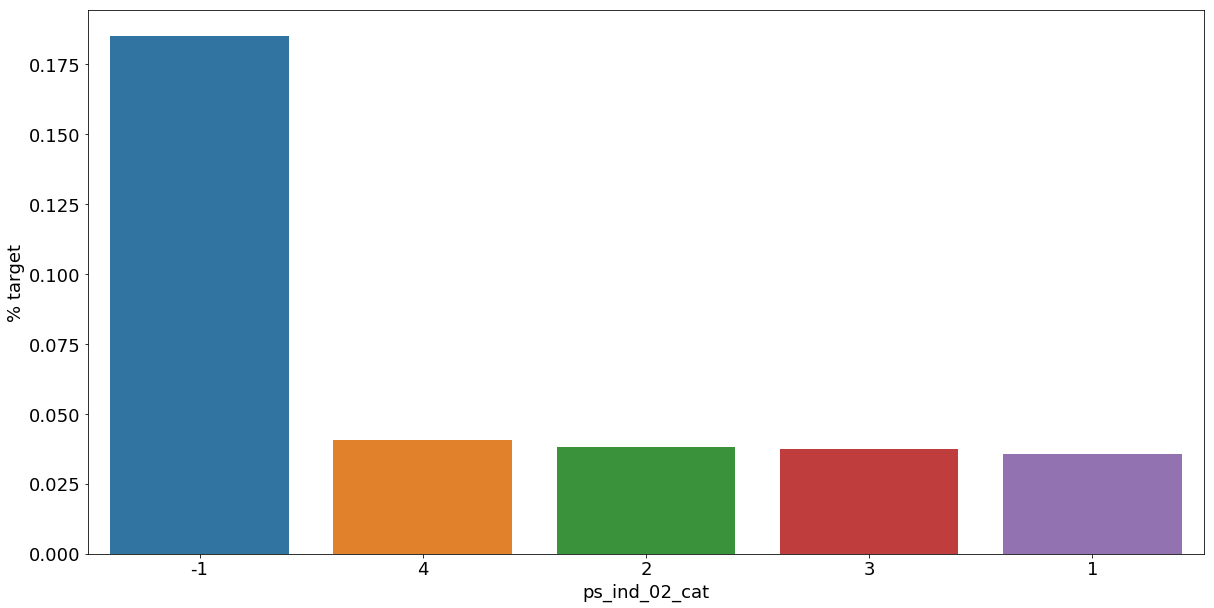

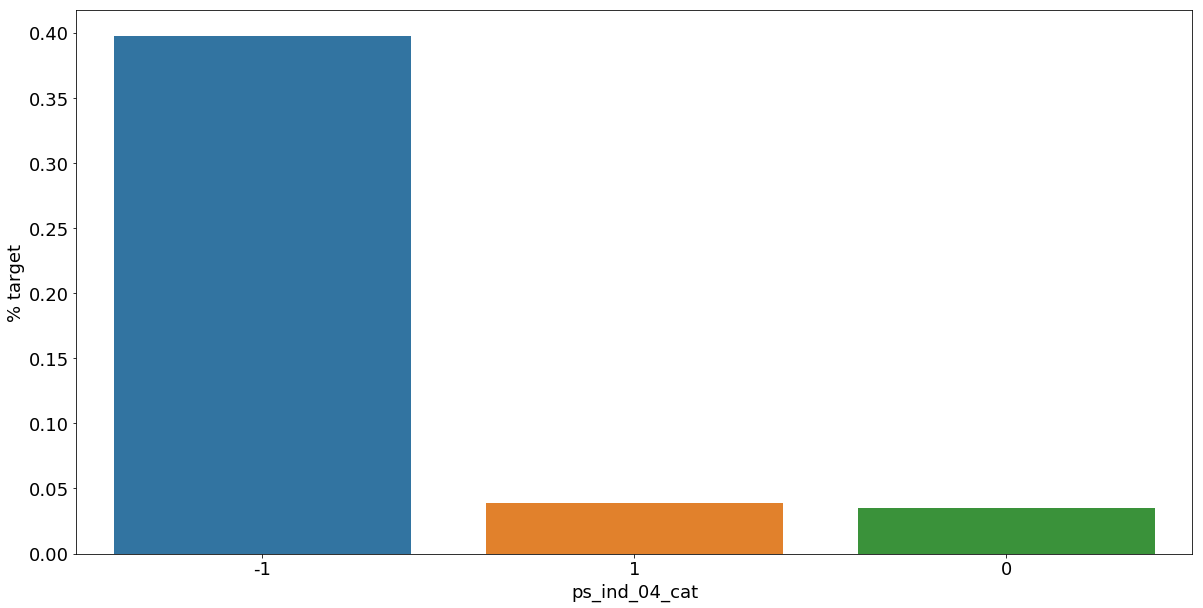

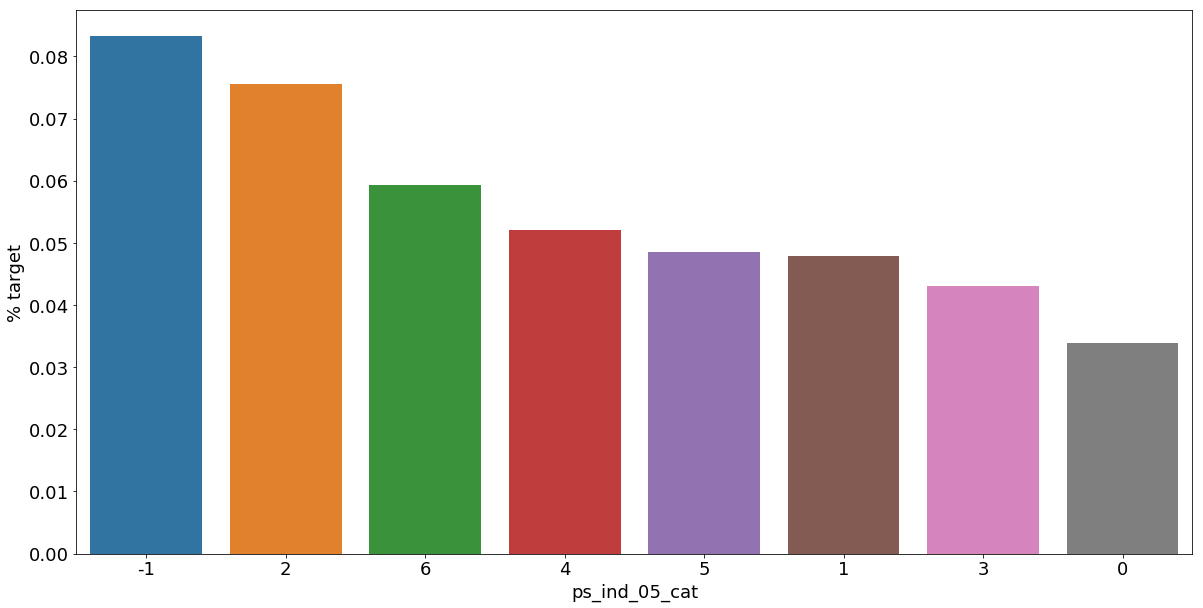

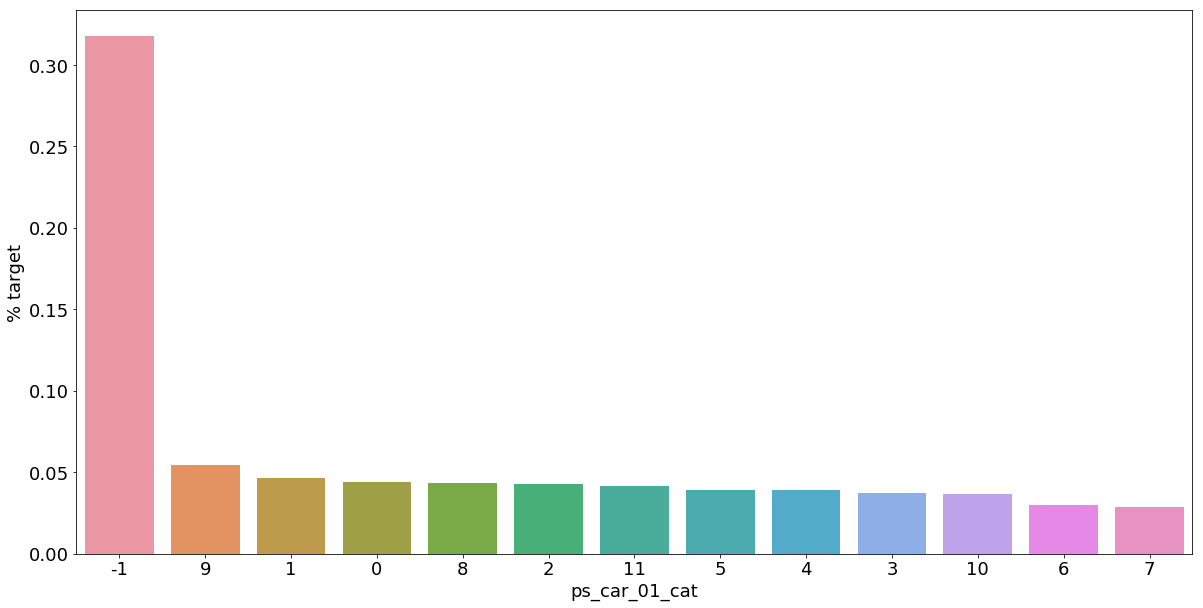

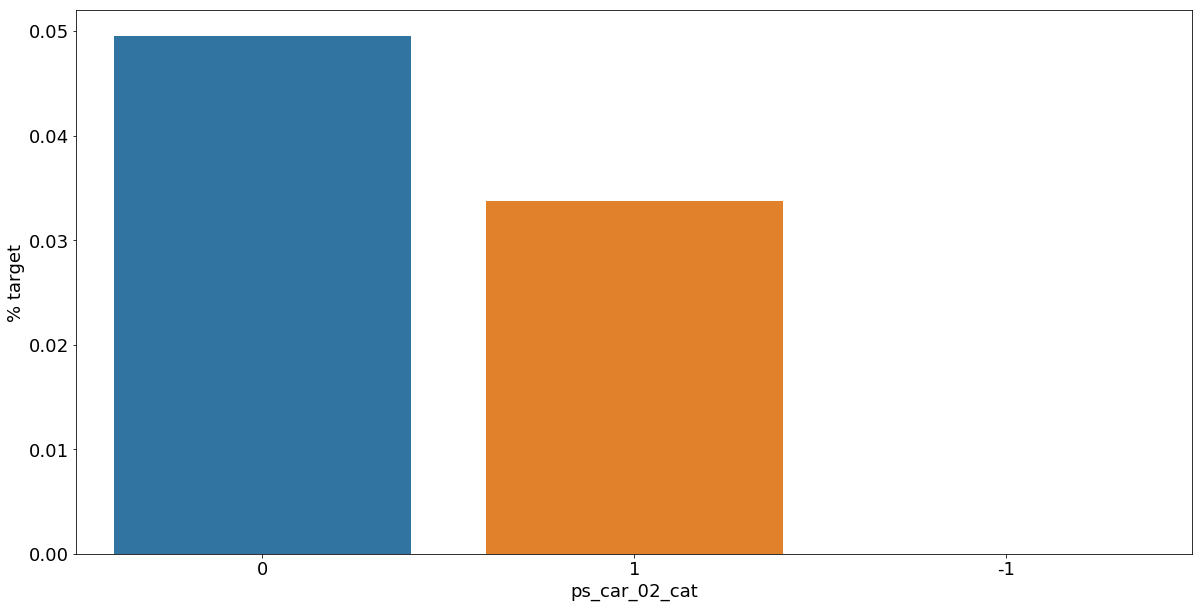

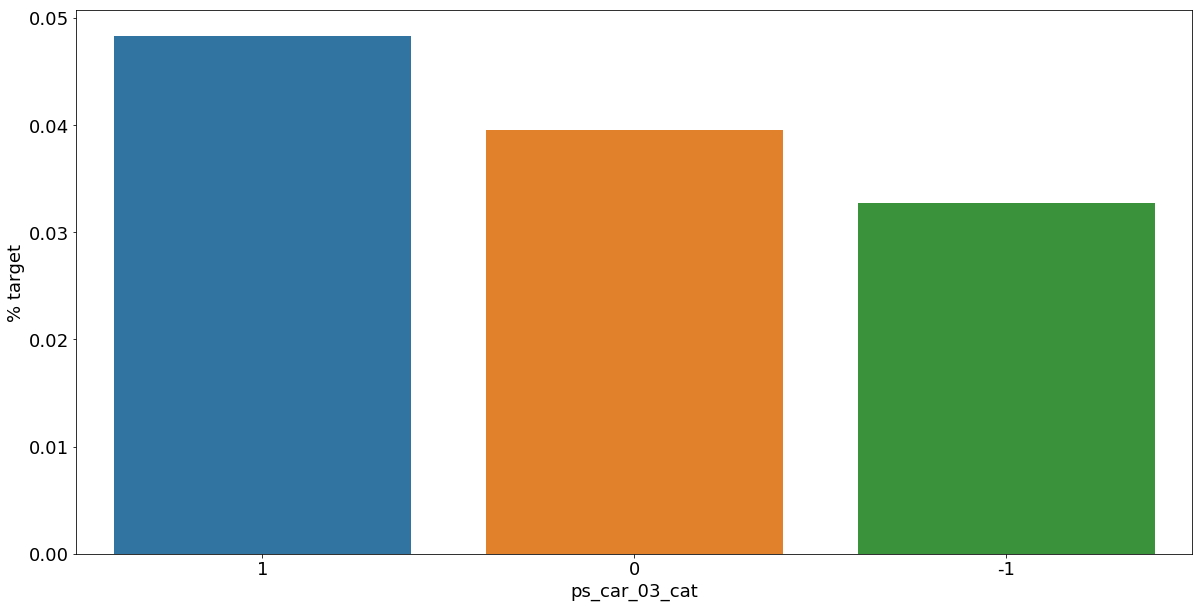

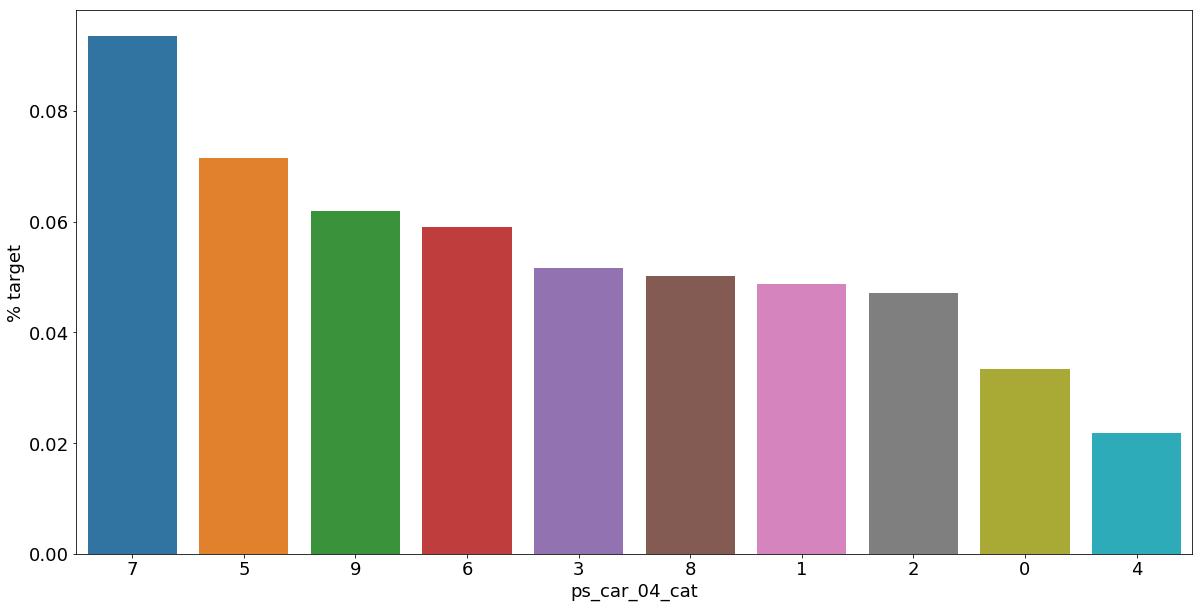

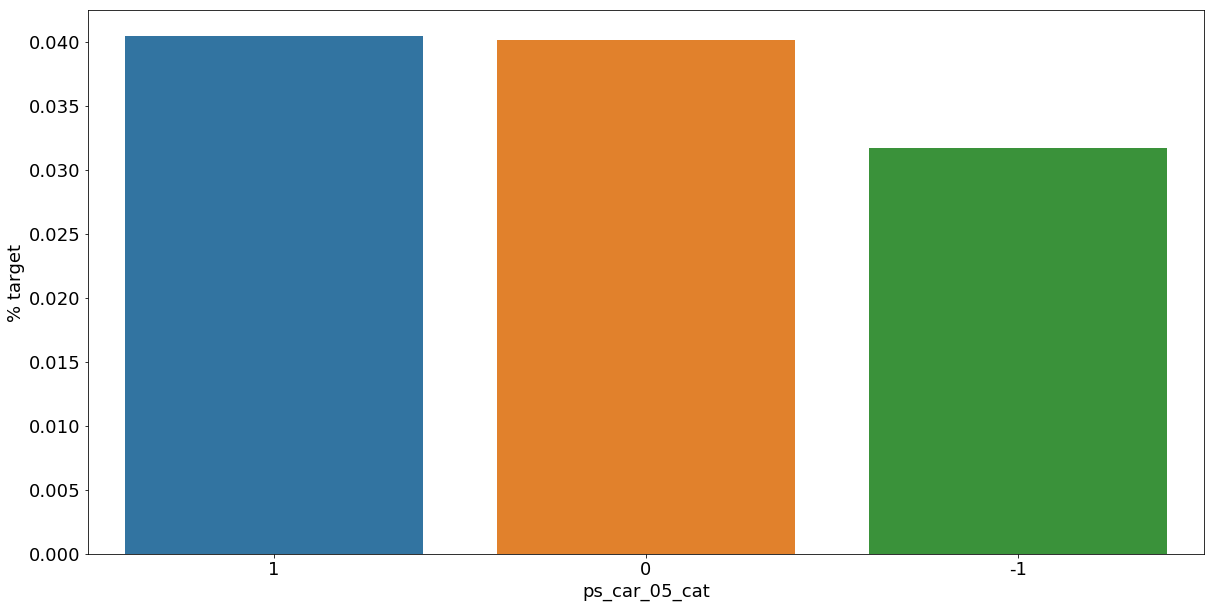

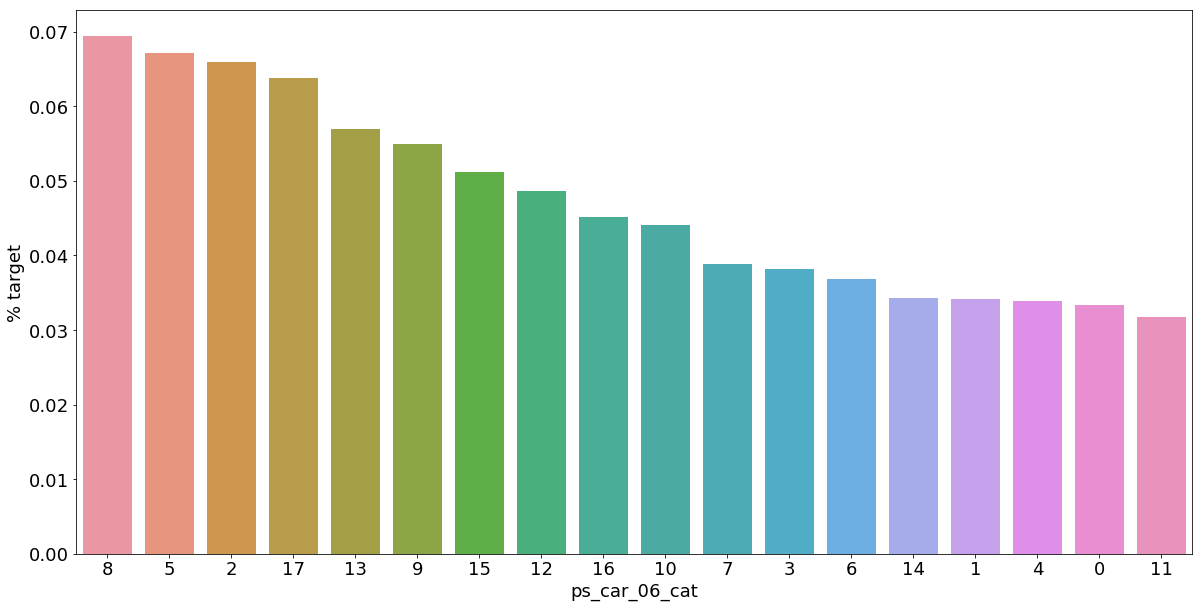

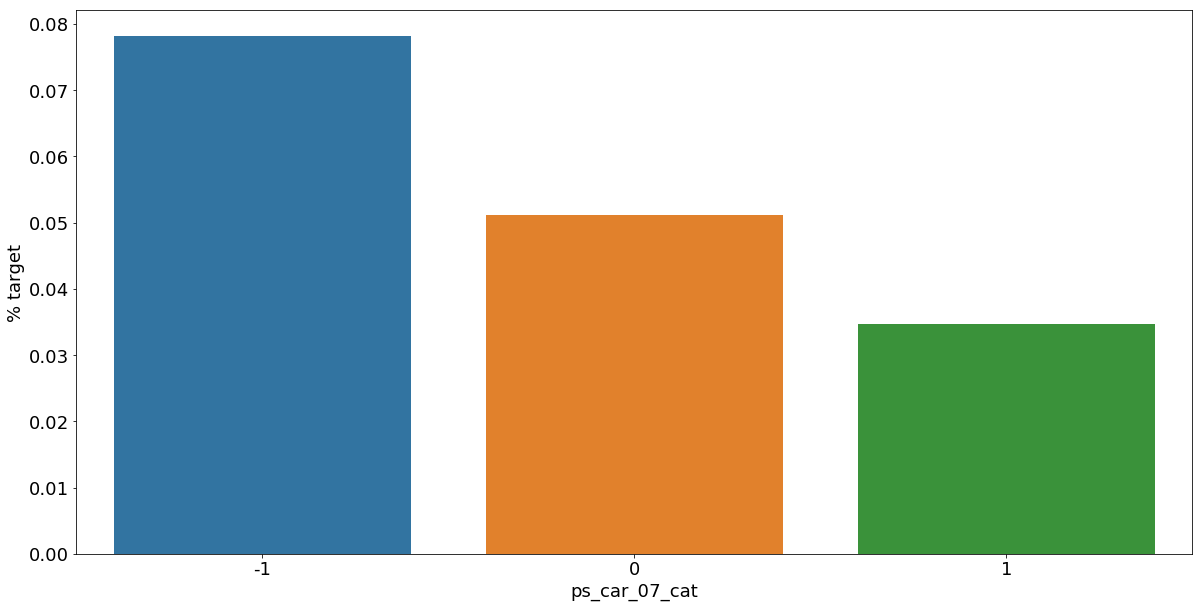

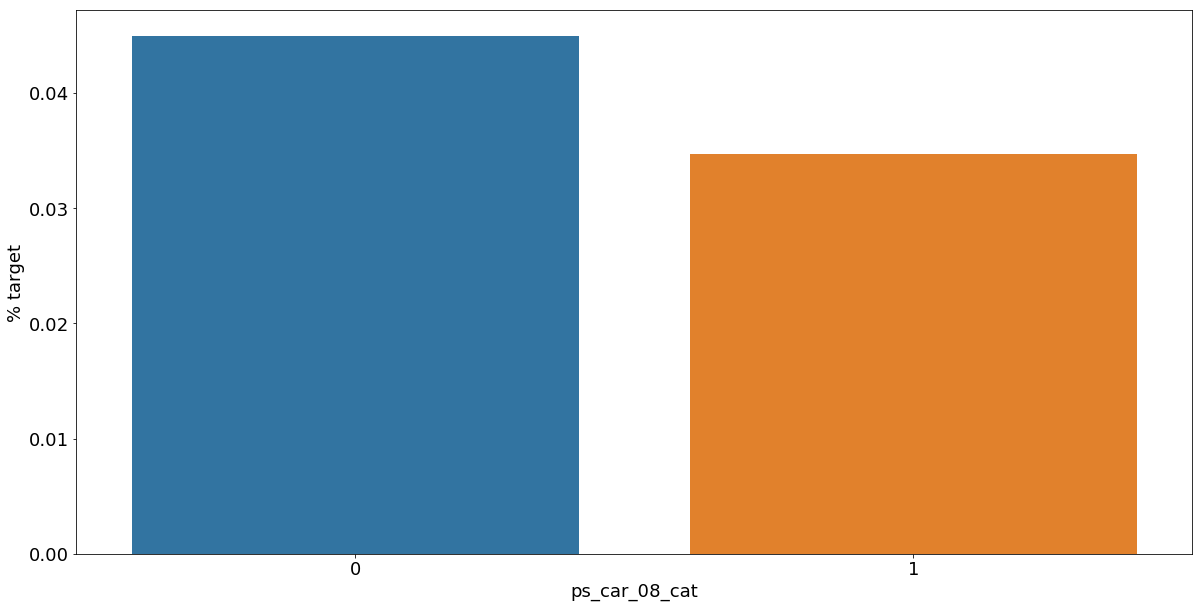

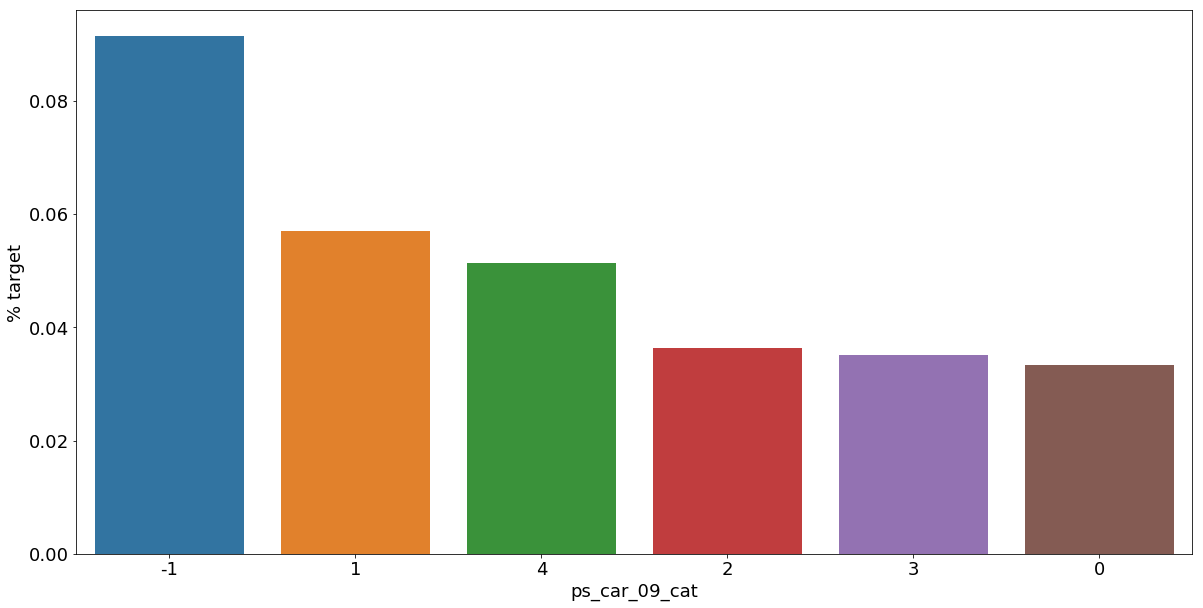

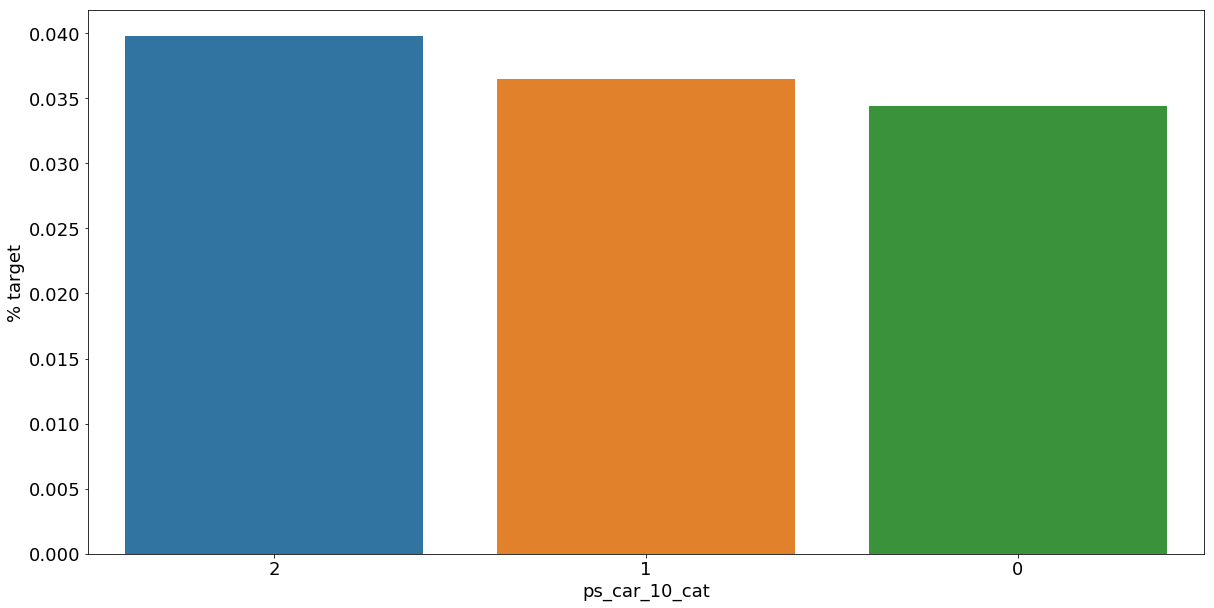

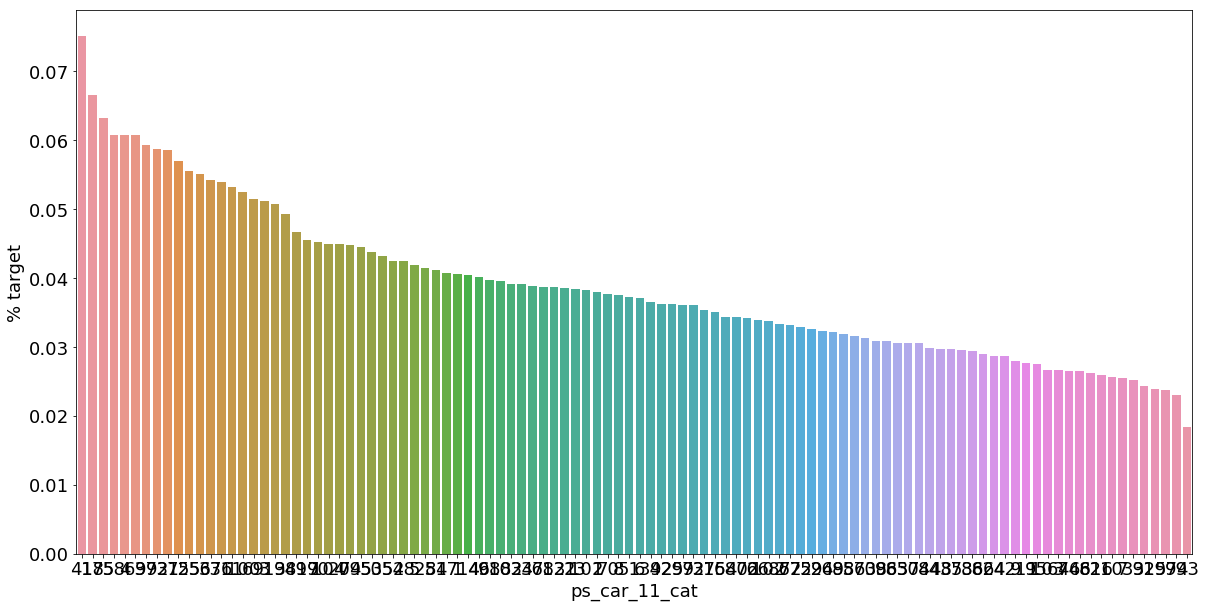

In [7]:
for f in cat_features:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

From the figures above, we can see that the proportions of missing values for some features are large, so **keeping the missing values as a separate category value** would be better than replacing them by the mode. These features are as follow:
1. 'ps_ind_02_cat'
2. 'ps_ind_04_cat'
3. 'ps_ind_05_cat'
4. 'ps_car_01_cat'
5. 'ps_car_03_cat'
6. 'ps_car_05_cat'
7. 'ps_car_07_cat'
8. 'ps_car_09_cat'

Maybe the customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim. 

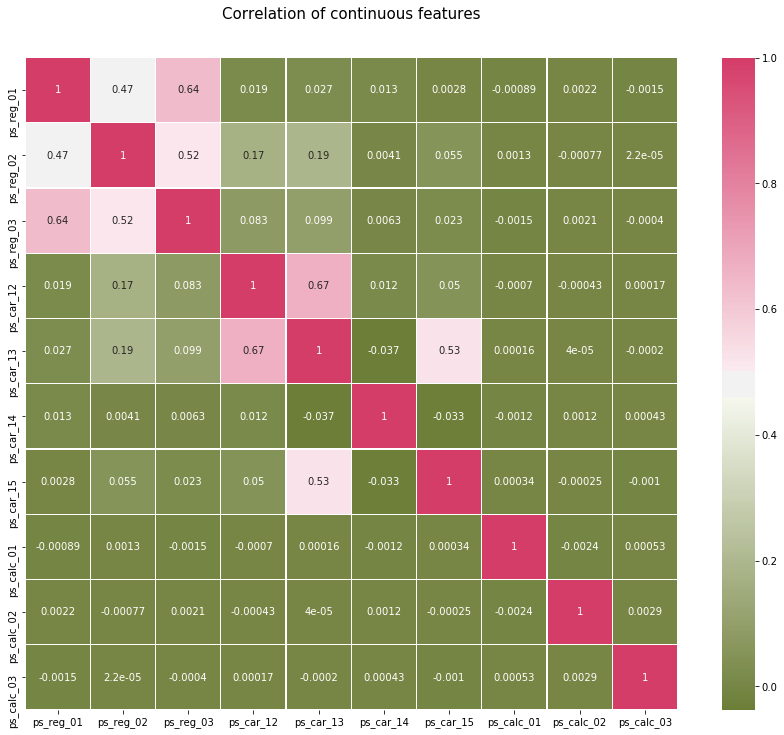

In [33]:
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Correlation of continuous features', y=1.05, size=15)
cmap = sns.diverging_palette(100, 0, as_cmap=True)
sns.heatmap(train[continue_features].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=cmap, linecolor='white', annot=True)

From the correlation map of continuous features, we can see that the majority of the features display zero or no correlation to one another. This is a good news. There are four pairs features that might have strong linear correlation as follow:
1. (ps_reg_01, ps_reg_03)
2. (ps_reg_02, ps_reg_03)
3. (ps_car_12, ps_car_13)
4. (ps_car_13, ps_car_15)

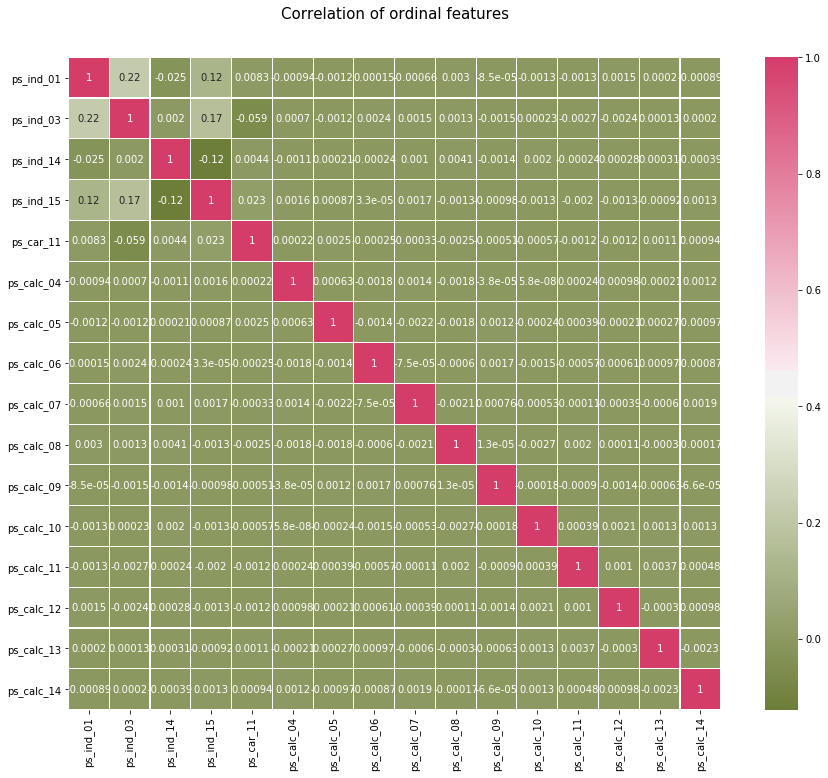

In [32]:
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Correlation of ordinal features', y=1.05, size=15)
cmap = sns.diverging_palette(100, 0, as_cmap=True)
sns.heatmap(train[ordinal_features].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=cmap, linecolor='white', annot=True)

From the correlation map of ordinal features, we can see that the majority of the features display zero or no correlation to one another. This is also a good news.